## read in data

In [1]:
# param
version = '20250301'
prop = 'change'
tgt = 'soc_change'
space = 'normal'
output_folder = './metric/'

In [3]:
# data
import pandas as pd
import numpy as np
cal = pd.read_parquet(f'./material/data.pair_cal_v{version}.pq')
print(cal.shape)

(1000, 985)


In [4]:
# covariate
covs = cal.columns[21::].values.tolist()
covs.remove('tile_id')


## feature selection

In [11]:
from model_fit import cfi_calc
print(cal.shape)
cal = cal.dropna(subset = covs+[tgt])
print(cal.shape)
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

(1000, 985)
(1000, 985)
start bootstrap on different subset...
[07:49:47] 0 iteration, training size: 700
[07:49:52] 1 iteration, training size: 700
[07:49:56] 2 iteration, training size: 700
[07:50:01] 3 iteration, training size: 700
[07:50:06] 4 iteration, training size: 700
[07:50:10] 5 iteration, training size: 700
[07:50:15] 6 iteration, training size: 700
[07:50:20] 7 iteration, training size: 700
[07:50:24] 8 iteration, training size: 700
[07:50:28] 9 iteration, training size: 700
[07:50:33] 10 iteration, training size: 700
[07:50:37] 11 iteration, training size: 700
[07:50:41] 12 iteration, training size: 700
[07:50:46] 13 iteration, training size: 700
[07:50:51] 14 iteration, training size: 700
[07:50:55] 15 iteration, training size: 700
[07:51:00] 16 iteration, training size: 700
[07:51:05] 17 iteration, training size: 700
[07:51:09] 18 iteration, training size: 700
[07:51:14] 19 iteration, training size: 700


[08:37:54] processing 0.0 ...
[08:38:17] processing 0.0002 ...
[08:38:40] processing 0.0004 ...
[08:38:56] processing 0.0006000000000000001 ...
[08:39:09] processing 0.0008 ...
[08:39:18] processing 0.001 ...
[08:39:25] processing 0.0012000000000000001 ...
[08:39:32] processing 0.0014 ...
[08:39:37] processing 0.0016 ...
[08:39:42] processing 0.0018000000000000002 ...
[08:39:46] processing 0.002 ...
[08:39:50] processing 0.0022 ...
[08:39:54] processing 0.0024000000000000002 ...
[08:39:57] processing 0.0026000000000000003 ...
[08:40:00] processing 0.0028 ...
[08:40:03] processing 0.003 ...
[08:40:05] processing 0.0032 ...
[08:40:08] processing 0.0034000000000000002 ...
[08:40:10] processing 0.0036000000000000003 ...
[08:40:12] processing 0.0038 ...
[08:40:14] processing 0.004 ...
[08:40:16] processing 0.004200000000000001 ...
[08:40:17] processing 0.0044 ...
[08:40:19] processing 0.0046 ...
[08:40:20] processing 0.0048000000000000004 ...
[08:40:22] processing 0.005 ...
[08:40:23] proce

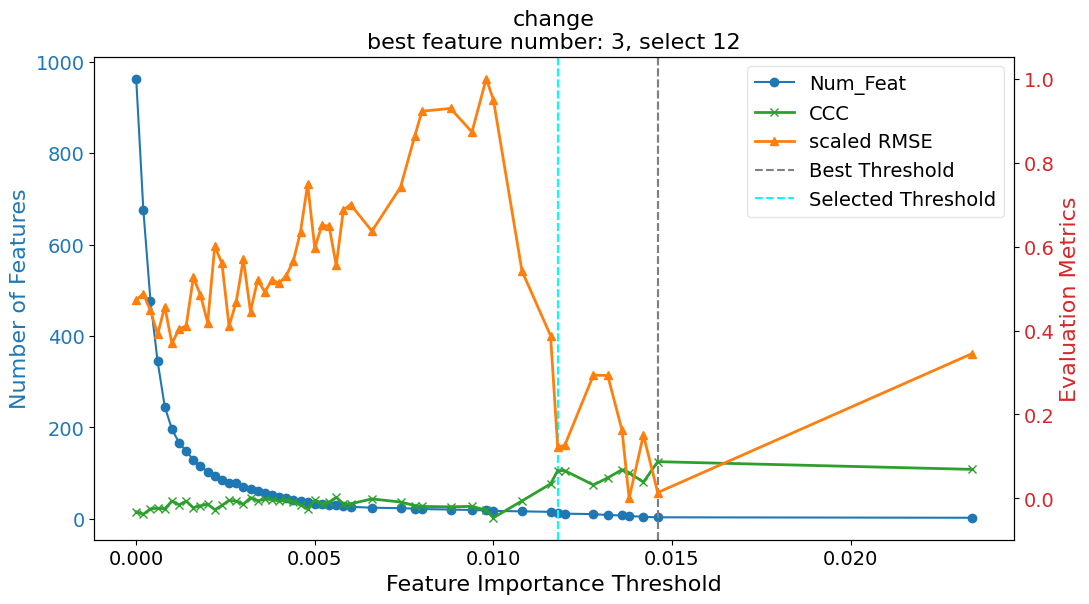

In [5]:
from model_fit import rscfi
cfi = pd.read_csv(f'./metric/feature_cfi_{prop}_v20250301.csv')
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

## paramter fine-tuning

In [6]:
from model_fit import parameter_fine_tuning, read_features
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version, strata_col=None)

[08:40:42] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 12
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 12
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 36
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 108
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 324
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 972
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [7]:
models[0]


RandomForestRegressor(max_depth=20, max_features=0.5, min_samples_leaf=4,
                      n_estimators=64)

In [8]:
len(models[0].feature_names_in_)

12